In [219]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [220]:
value = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(value[:,1])
t_c = torch.tensor(value[:,0])
learning_rate = 1e-1
n_epochs = 5000


In [221]:

w = w1 = w2 = torch.ones(1)
b = torch.zeros(1)
old_params = torch.tensor([w, b], requires_grad=True)
new_params = torch.tensor([w1, w2, b], requires_grad=True)

def model(t_u, w, b):
    return w * t_u + b

def model_new(t_u, w1, w2, b):
    return w2 * (t_u **2) + w1 * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

In [222]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

t_un = 0.1 * t_u
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 2
tensor([ 0, 10,  8,  2,  7,  6,  3,  9,  1])
tensor([4, 5])


In [223]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    training_loss_list_old = []
    validation_loss_list_old = []
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        training_loss_list_old.append(round(train_loss.item(), 4))
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        validation_loss_list_old.append(round(val_loss.item(), 4))
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return training_loss_list_old, validation_loss_list_old

Epoch 1, Training loss 1741.9811, Validation loss 1862.4500
Epoch 2, Training loss 1313.6138, Validation loss 1427.6564
Epoch 3, Training loss 948.9830, Validation loss 1052.7960
Epoch 500, Training loss 6.8792, Validation loss 5.1868
Epoch 1000, Training loss 3.0349, Validation loss 3.5001
Epoch 1500, Training loss 2.9693, Validation loss 3.3129
Epoch 2000, Training loss 2.9692, Validation loss 3.3046
Epoch 2500, Training loss 2.9692, Validation loss 3.3046
Epoch 3000, Training loss 2.9692, Validation loss 3.3046
Epoch 3500, Training loss 2.9692, Validation loss 3.3046
Epoch 4000, Training loss 2.9692, Validation loss 3.3046
Epoch 4500, Training loss 2.9692, Validation loss 3.3046
Epoch 5000, Training loss 2.9692, Validation loss 3.3046


Text(0, 0.5, 'Temperatur, Grad Celsius')

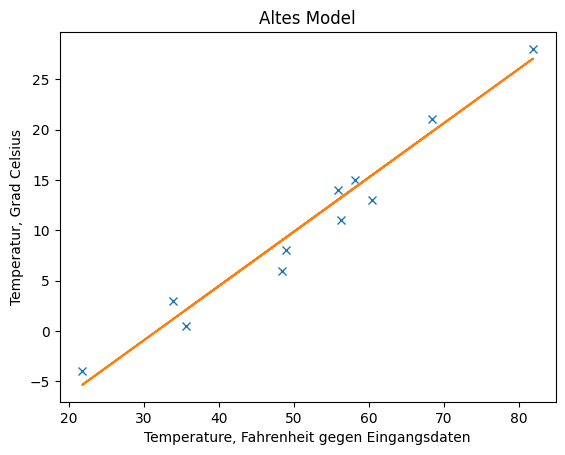

In [224]:
params = old_params
optimizer = optim.Adam([params], lr=learning_rate)

training_loss_list_old, validation_loss_list_old = training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c)

plt.plot(t_u, t_c, 'x')
t_p = model(t_u, *params)
plt.plot(t_u, t_p.detach().numpy())
plt.title("Altes Model")
plt.xlabel("Temperature, Fahrenheit gegen Eingangsdaten")
plt.ylabel("Temperatur, Grad Celsius")

In [225]:
def training_loop_new(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    training_loss_list_new = []
    validation_loss_list_new = []
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_new(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        training_loss_list_new.append(round(train_loss.item(), 4))
        val_t_p = model_new(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        validation_loss_list_new.append(round(val_loss.item(), 4))
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return training_loss_list_new, validation_loss_list_new

Epoch 1, Training loss 12505874.7472, Validation loss 8125659.8761
Epoch 2, Training loss 10120239.1755, Validation loss 6576343.0766
Epoch 3, Training loss 7995168.5450, Validation loss 5196159.5027
Epoch 500, Training loss 5.6433, Validation loss 1.1369
Epoch 1000, Training loss 4.4942, Validation loss 0.4170
Epoch 1500, Training loss 4.1643, Validation loss 0.2326
Epoch 2000, Training loss 4.0975, Validation loss 0.2159
Epoch 2500, Training loss 4.0566, Validation loss 0.2182
Epoch 3000, Training loss 4.0066, Validation loss 0.2219
Epoch 3500, Training loss 3.9437, Validation loss 0.2270
Epoch 4000, Training loss 3.8658, Validation loss 0.2345
Epoch 4500, Training loss 3.7708, Validation loss 0.2452
Epoch 5000, Training loss 3.6570, Validation loss 0.2608


Text(0, 0.5, 'Temperatur, Grad Celsius')

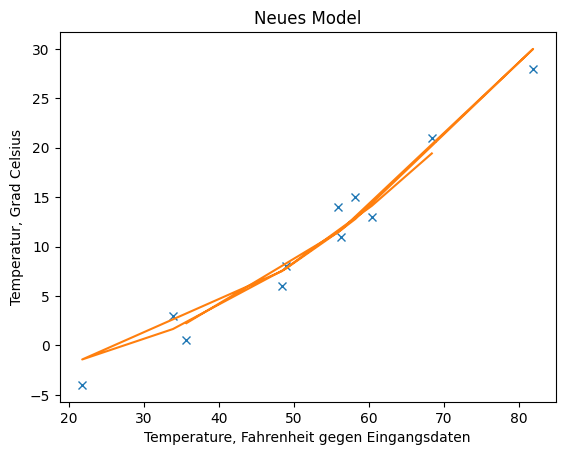

In [226]:
params = new_params
optimizer = optim.Adam([params], lr=learning_rate)

training_loss_list_new, validation_loss_list_new =  training_loop_new(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c)

plt.plot(t_u, t_c, 'x')
t_p = model_new(t_u, *params)
plt.plot(t_u, t_p.detach().numpy())
plt.title("Neues Model")
plt.xlabel("Temperature, Fahrenheit gegen Eingangsdaten")
plt.ylabel("Temperatur, Grad Celsius")

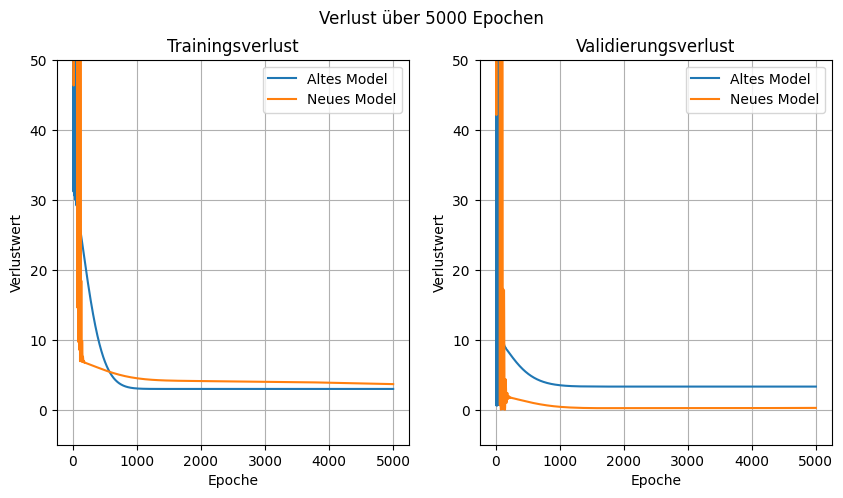

In [227]:
def plot_loss(loss_list_new, loss_list_old, title):
    epochs_list = list(range(1, n_epochs+1))
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    for i in range(2):
        ax[i].plot(epochs_list, loss_list_old[i], label="Altes Model")
        ax[i].plot(epochs_list, loss_list_new[i], label="Neues Model")
        ax[i].legend()
        ax[i].set_title(title[i])
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel("Verlustwert")
        ax[i].grid()
        ax[i].set_ylim(-5, 50);
    fig.suptitle("Verlust über 5000 Epochen")
    plt.show()

loss_list_new = [training_loss_list_new, validation_loss_list_new]
loss_list_old = [training_loss_list_old, validation_loss_list_old]
title = ["Trainingsverlust", "Validierungsverlust"]
plot_loss(loss_list_new, loss_list_old, title)


In dem letzten Graphen kann man sehen dass die Valiedierungsverlustwerte bei dem Alten Model aus der Vorlesung (Orange) schlechter sind (größer), als bei dem Neuen Model der Hausaufgabe (Blau). Das Neue Model hat einen um 0.7 größeren Trainingverlust, dafür aber einen um 3.1 kleineren Validierungsverlust. Somit kann man sagen, dass as Ergebnis mit dem neuen Modell besser aussieht.